### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [58]:
pip install matplotlib seaborn pandas numpy


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [60]:
data = pd.read_csv('data/coupons.csv')

In [61]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [62]:
data.info

<bound method DataFrame.info of            destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  

In [63]:
print(data.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [64]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [66]:
data['car']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
12679    NaN
12680    NaN
12681    NaN
12682    NaN
12683    NaN
Name: car, Length: 12684, dtype: object

2. Investigate the dataset for missing or problematic data.

In [67]:
missing_values = data.isnull().sum()

missing_percentage = (missing_values / len(data)) * 100

print(missing_percentage[missing_percentage > 0])

car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64


Missing Data Analysis

Car Column: The missing data percentage for this column is 99.15%. 

CoffeeHouse Column: The missing data percentage is 1.71%.

CarryAway Column: The missing data percentage is 1.19%. 

RestaurantLessThan20 Column: The missing data percentage is 1.02%. 

Restaurant20To50 Column: The missing data percentage is 1.49%. 


3. Decide what to do about your missing data -- drop, replace, other...

In [68]:
data.drop(columns=['car'], inplace=True)

In [69]:

data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)


In [70]:
missing_values = data.isnull().sum()

missing_percentage = (missing_values / len(data)) * 100

print(missing_percentage[missing_percentage > 0])

Series([], dtype: float64)


During the data cleaning process, I first used the pandas library to check for missing values in the dataset. I found that the car column had a very high percentage of missing values (99.15%), so I decided to remove this column entirely. For other columns with lower percentages of missing data (such as Bar, CoffeeHouse, CarryAway, etc.), I filled the missing values using the mode (i.e., the most frequent value) of each respective column. This approach ensured the completeness of the data and eliminated all missing values, providing a clean dataset for further analysis and modeling.

4. What proportion of the total observations chose to accept the coupon? 



In [71]:
bar_unique_values = data['Bar'].unique()
coffeehouse_unique_values = data['CoffeeHouse'].unique()
carryaway_unique_values = data['CarryAway'].unique()


print("Bar column unique values:", bar_unique_values)
print("CoffeeHouse column unique values:", coffeehouse_unique_values)
print("CarryAway column unique values:", carryaway_unique_values)

Bar column unique values: ['never' 'less1' '1~3' 'gt8' '4~8']
CoffeeHouse column unique values: ['never' 'less1' '4~8' '1~3' 'gt8']
CarryAway column unique values: ['1~3' '4~8' 'gt8' 'less1' 'never']


In [72]:
accept_values = ['less1', '1~3', '4~8', 'gt8']


data['Acceptance Count'] = data[['Bar', 'CoffeeHouse', 'CarryAway']].apply(lambda x: sum(x.isin(accept_values)), axis=1)


total_accepted = data['Acceptance Count'].sum()
total_possible = len(data) * 3  

acceptance_ratio = total_accepted / total_possible

print(f"The overall acceptance ratio is {acceptance_ratio:.2%}.")

The overall acceptance ratio is 77.88%.


5. Use a bar plot to visualize the `coupon` column.

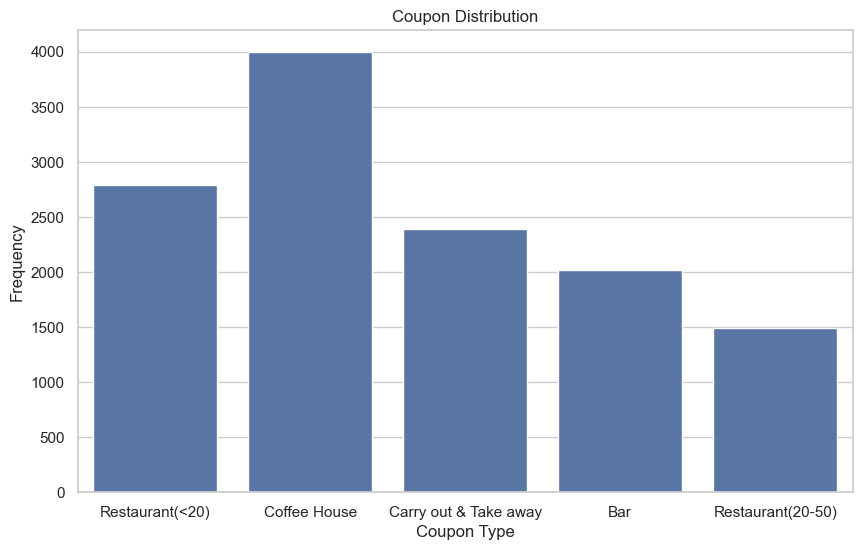

In [88]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data)

plt.title('Coupon Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.show()

6. Use a histogram to visualize the temperature column.

In [84]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 257.1 kB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [86]:
import plotly.express as px

fig = px.histogram(data_frame=data, x='temperature', title='Temperature Distribution')


fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.

In [157]:
df_bar = data[data['coupon'] == 'Bar']
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Acceptance Count
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21.0,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21.0,Unmarried partner,...,1~3,4~8,1~3,1,0,0,1,0,1,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21.0,Unmarried partner,...,1~3,4~8,1~3,1,1,1,0,1,0,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21.0,Single,...,4~8,4~8,less1,1,0,0,0,1,1,2
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21.0,Single,...,4~8,4~8,less1,1,0,0,1,0,1,2


2. What proportion of bar coupons were accepted?


In [93]:

accept_conditions = ['less1', '1~3', '4~8', 'gt8']
accepted_count = df_bar.isin(accept_conditions).sum()


total_count = len(df_bar)


acceptance_ratio = accepted_count / total_count

print(f"The proportion of bar coupons that were accepted is {acceptance_ratio:.2%}.")

The proportion of bar coupons that were accepted is 58.18%.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [130]:
bar_less3 = ['less1', ' 1~3']
bar_gt3 = ['4~8', 'gt8']

accepted_count_less3 = df_bar.isin(bar_less3).sum()
accepted_count_gt3 = df_bar.isin(bar_gt3).sum()

rate = accepted_count_less3 / accepted_count_gt3 
print(rate)

2.4435087719298245


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [155]:
# Check the current data types
print(df_bar.dtypes)




destination              object
passanger                object
weather                  object
temperature               int64
time                     object
coupon                   object
expiration               object
gender                   object
age                     float64
maritalStatus            object
has_children              int64
education                object
occupation               object
income                   object
Bar                     float64
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
Acceptance Count          int64
dtype: object


In [160]:
df_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

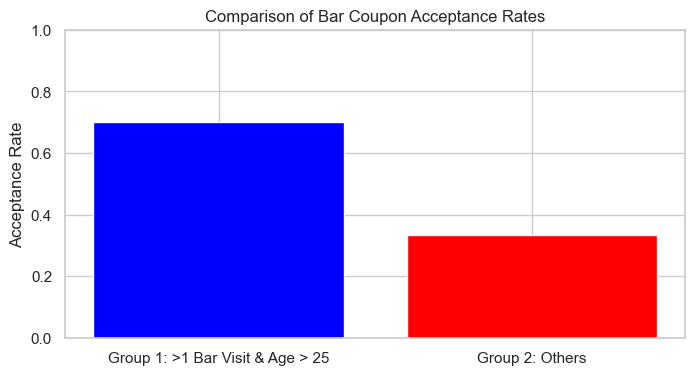

2.0912437380963818


In [170]:
frequent_bar_visits = df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])

group1 = df_bar[frequent_bar_visits & (df_bar['age'] > 25)]
group2 = df_bar[~frequent_bar_visits | (df_bar['age'] <= 25)]

acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()


plt.figure(figsize=(8, 4))
plt.bar(['Group 1: >1 Bar Visit & Age > 25', 'Group 2: Others'], [acceptance_rate_group1, acceptance_rate_group2], color=['blue', 'red'])
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Bar Coupon Acceptance Rates')
plt.ylim(0, 1)  
plt.show()

rate = (acceptance_rate_group1 / acceptance_rate_group2)
print(rate)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [172]:
print(df_bar['passanger'].unique())
print(df_bar['occupation'].unique())


['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


Group 1 Acceptance Rate: 0.7132486388384754
Group 2 Acceptance Rate: 0.296043656207367


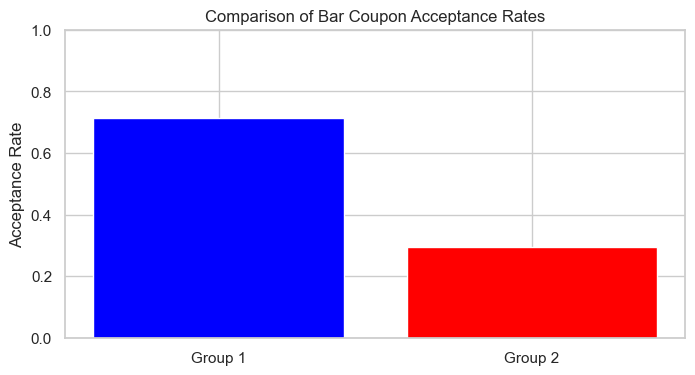

In [175]:

frequent_bar_visits = df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])
no_kids_passenger = df_bar['passanger'] != 'Kid(s)'
non_agriculture_occupation = ~df_bar['occupation'].isin(['Farming', 'Fishing', 'Forestry'])


group1 = df_bar[frequent_bar_visits & no_kids_passenger & non_agriculture_occupation]
group2 = df_bar[~(frequent_bar_visits & no_kids_passenger & non_agriculture_occupation)]


acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()


print("Group 1 Acceptance Rate:", acceptance_rate_group1)
print("Group 2 Acceptance Rate:", acceptance_rate_group2)


plt.figure(figsize=(8, 4))
plt.bar(['Group 1', 'Group 2'], [acceptance_rate_group1, acceptance_rate_group2], color=['blue', 'red'])
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Bar Coupon Acceptance Rates')
plt.ylim(0, 1)
plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [178]:
df_bar['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

Group 1 Acceptance Rate: 0.7132486388384754
Group 2 Acceptance Rate: 0.7313432835820896
Group 3 Acceptance Rate: 0.4897959183673469


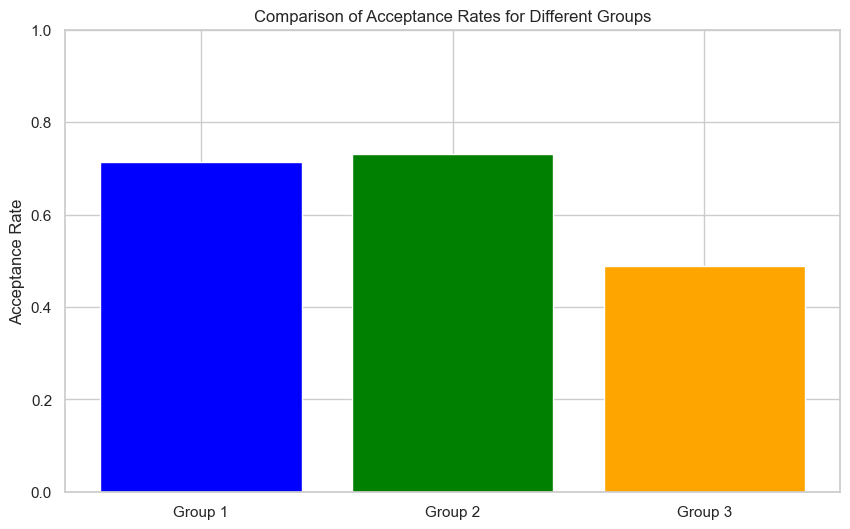

In [179]:

frequent_bar_visits = df_bar['Bar'].isin(['1~3', '4~8', 'gt8'])
no_kids_passenger = df_bar['passanger'] != 'Kid(s)'
not_widowed = df_bar['maritalStatus'] != 'Widowed'
age_under_30 = df_bar['age'] < 30
frequent_cheap_restaurant = df_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])
income_below_50k = df_bar['income'] == '$37500 - $49999'


group1 = df_bar[frequent_bar_visits & no_kids_passenger & not_widowed]
group2 = df_bar[frequent_bar_visits & age_under_30]
group3 = df_bar[frequent_cheap_restaurant & income_below_50k]


acceptance_rate_group1 = group1['Y'].mean()
acceptance_rate_group2 = group2['Y'].mean()
acceptance_rate_group3 = group3['Y'].mean()


print("Group 1 Acceptance Rate:", acceptance_rate_group1)
print("Group 2 Acceptance Rate:", acceptance_rate_group2)
print("Group 3 Acceptance Rate:", acceptance_rate_group3)


plt.figure(figsize=(10, 6))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [acceptance_rate_group1, acceptance_rate_group2, acceptance_rate_group3], color=['blue', 'green', 'orange'])
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Acceptance Rates for Different Groups')
plt.ylim(0, 1)
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  